In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [2]:
# Loading the dataset

# Train dataset
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')


# Test dataset
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
# Shape of the dataset

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [4]:
# Reshape the dataset
X_train = X_train.reshape(len(X_train), 100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test  = X_test.reshape(len(X_test), 100,100,3)
Y_test  = Y_test.reshape(len(Y_test),1)

In [5]:
# Checking the shape of resized dataset

# train data
print(X_train.shape)
print(Y_train.shape)

# test data
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [6]:
print(X_train)

[[[[ 37.  39.  25.]
   [ 26.  24.   9.]
   [ 34.  25.  10.]
   ...
   [ 57.  44.  35.]
   [ 61.  47.  38.]
   [ 65.  51.  42.]]

  [[ 45.  43.  28.]
   [ 28.  25.   8.]
   [ 52.  40.  24.]
   ...
   [ 54.  41.  32.]
   [ 57.  43.  34.]
   [ 61.  47.  38.]]

  [[ 52.  45.  26.]
   [ 32.  24.   5.]
   [ 69.  54.  35.]
   ...
   [ 54.  40.  29.]
   [ 56.  42.  31.]
   [ 59.  45.  34.]]

  ...

  [[ 20.  39.   0.]
   [101. 125.  67.]
   [152. 182. 120.]
   ...
   [ 46.  41.  19.]
   [ 60.  55.  33.]
   [ 60.  55.  33.]]

  [[ 46.  65.   9.]
   [116. 140.  82.]
   [156. 186. 124.]
   ...
   [ 64.  60.  35.]
   [ 75.  71.  46.]
   [ 72.  68.  43.]]

  [[ 81. 100.  44.]
   [126. 150.  92.]
   [146. 176. 114.]
   ...
   [ 67.  63.  38.]
   [ 78.  74.  49.]
   [ 58.  54.  29.]]]


 [[[131. 128. 135.]
   [160. 157. 164.]
   [198. 192. 204.]
   ...
   [250. 249. 247.]
   [255. 255. 253.]
   [250. 249. 245.]]

  [[140. 137. 144.]
   [127. 124. 131.]
   [120. 114. 124.]
   ...
   [251. 253. 252.]
 

In [7]:
print(X_test)

[[[[118.  82.  96.]
   [109.  71.  82.]
   [116.  77.  78.]
   ...
   [170. 134. 100.]
   [165. 129.  93.]
   [163. 127.  91.]]

  [[ 95.  62.  73.]
   [104.  69.  76.]
   [110.  75.  73.]
   ...
   [174. 138. 102.]
   [170. 134.  98.]
   [167. 132.  94.]]

  [[177. 148. 153.]
   [181. 151. 153.]
   [173. 142. 137.]
   ...
   [175. 141. 103.]
   [171. 137.  99.]
   [168. 135.  94.]]

  ...

  [[ 63.  60.  77.]
   [ 65.  64.  80.]
   [ 65.  67.  82.]
   ...
   [148.  98.  63.]
   [155.  98.  43.]
   [145.  84.  19.]]

  [[ 58.  55.  72.]
   [ 60.  59.  75.]
   [ 60.  62.  77.]
   ...
   [132.  82.  49.]
   [143.  86.  31.]
   [138.  77.  14.]]

  [[ 58.  55.  72.]
   [ 58.  57.  73.]
   [ 55.  57.  72.]
   ...
   [123.  73.  40.]
   [139.  82.  29.]
   [140.  79.  16.]]]


 [[[223. 211. 163.]
   [223. 209. 160.]
   [244. 228. 179.]
   ...
   [252. 253. 255.]
   [254. 255. 255.]
   [245. 246. 250.]]

  [[255. 246. 206.]
   [254. 241. 199.]
   [255. 251. 206.]
   ...
   [252. 252. 250.]
 

# DATA PREPROCESSING


As we want the pixel size in the range of 0 to 255, let's divide the input image by size/255.

In [8]:
X_train = X_train/255.0

X_test  = X_test/255.0

In [9]:
print(X_train)

[[[[0.14509804 0.15294118 0.09803922]
   [0.10196078 0.09411765 0.03529412]
   [0.13333333 0.09803922 0.03921569]
   ...
   [0.22352941 0.17254902 0.1372549 ]
   [0.23921569 0.18431373 0.14901961]
   [0.25490196 0.2        0.16470588]]

  [[0.17647059 0.16862745 0.10980392]
   [0.10980392 0.09803922 0.03137255]
   [0.20392157 0.15686275 0.09411765]
   ...
   [0.21176471 0.16078431 0.1254902 ]
   [0.22352941 0.16862745 0.13333333]
   [0.23921569 0.18431373 0.14901961]]

  [[0.20392157 0.17647059 0.10196078]
   [0.1254902  0.09411765 0.01960784]
   [0.27058824 0.21176471 0.1372549 ]
   ...
   [0.21176471 0.15686275 0.11372549]
   [0.21960784 0.16470588 0.12156863]
   [0.23137255 0.17647059 0.13333333]]

  ...

  [[0.07843137 0.15294118 0.        ]
   [0.39607843 0.49019608 0.2627451 ]
   [0.59607843 0.71372549 0.47058824]
   ...
   [0.18039216 0.16078431 0.0745098 ]
   [0.23529412 0.21568627 0.12941176]
   [0.23529412 0.21568627 0.12941176]]

  [[0.18039216 0.25490196 0.03529412]
   [0.4

In [10]:
print(X_test)

[[[[0.4627451  0.32156863 0.37647059]
   [0.42745098 0.27843137 0.32156863]
   [0.45490196 0.30196078 0.30588235]
   ...
   [0.66666667 0.5254902  0.39215686]
   [0.64705882 0.50588235 0.36470588]
   [0.63921569 0.49803922 0.35686275]]

  [[0.37254902 0.24313725 0.28627451]
   [0.40784314 0.27058824 0.29803922]
   [0.43137255 0.29411765 0.28627451]
   ...
   [0.68235294 0.54117647 0.4       ]
   [0.66666667 0.5254902  0.38431373]
   [0.65490196 0.51764706 0.36862745]]

  [[0.69411765 0.58039216 0.6       ]
   [0.70980392 0.59215686 0.6       ]
   [0.67843137 0.55686275 0.5372549 ]
   ...
   [0.68627451 0.55294118 0.40392157]
   [0.67058824 0.5372549  0.38823529]
   [0.65882353 0.52941176 0.36862745]]

  ...

  [[0.24705882 0.23529412 0.30196078]
   [0.25490196 0.25098039 0.31372549]
   [0.25490196 0.2627451  0.32156863]
   ...
   [0.58039216 0.38431373 0.24705882]
   [0.60784314 0.38431373 0.16862745]
   [0.56862745 0.32941176 0.0745098 ]]

  [[0.22745098 0.21568627 0.28235294]
   [0.2

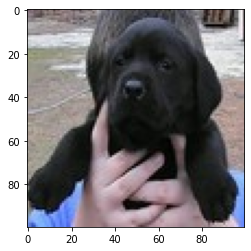

In [11]:
# DISPLAYING THE IMAGE FOR THE GIVEN INPUT

import random

# display the index position of the image
idx = random.randint(0,len(X_train))

# display the input image
plt.imshow(X_train[idx,:])

# BUILDING THE ANN MODEL TO PREDICT THE ACCURACY OF CAT DOG CLASSIFICATION

In [12]:
X_train.shape

(2000, 100, 100, 3)

In [15]:
# Develop the ANN Model
from tensorflow.keras.layers import Flatten, Dense

ann = Sequential([
    # create the flattening layer
    Flatten(input_shape = (100,100,3)),
    # create the first dense layer
    Dense(3000, activation = 'relu'),
    # create the second dense layer
    Dense(1000, activation = 'relu'),
    # create the output layer
    Dense(1, activation = 'sigmoid')
])

In [16]:
# compile the ANN Model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# train the ann model
ann.fit(X_train, Y_train, epochs = 10, batch_size = 100)

Epoch 1/10
20/20 [==============================] - 15s 654ms/step - loss: 18.5134 - accuracy: 0.4940
Epoch 2/10
20/20 [==============================] - 12s 615ms/step - loss: 1.9882 - accuracy: 0.5035
Epoch 3/10
20/20 [==============================] - 12s 596ms/step - loss: 0.7272 - accuracy: 0.5280
Epoch 4/10
20/20 [==============================] - 12s 577ms/step - loss: 0.6972 - accuracy: 0.5610
Epoch 5/10
20/20 [==============================] - 12s 578ms/step - loss: 0.7117 - accuracy: 0.5560
Epoch 6/10
20/20 [==============================] - 12s 604ms/step - loss: 0.6626 - accuracy: 0.5935
Epoch 7/10
20/20 [==============================] - 12s 602ms/step - loss: 0.6521 - accuracy: 0.6185
Epoch 8/10
20/20 [==============================] - 12s 600ms/step - loss: 0.6573 - accuracy: 0.6090
Epoch 9/10
20/20 [==============================] - 12s 587ms/step - loss: 0.6450 - accuracy: 0.6125
Epoch 10/10
20/20 [==============================] - 12s 595ms/step - loss: 0.6576 - accur

In [18]:
# summary of ANN Model
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_3 (Dense)             (None, 3000)              90003000  
                                                                 
 dense_4 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 93,005,001
Trainable params: 93,005,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Evaluate the ANN Model
# To calculate the loss and accuracy of the ann model
loss, accuracy = ann.evaluate(X_test, Y_test, verbose = 0)

print('Loss of the model is:', loss)

print('Accuracy of the model is:', accuracy)

Loss of the model is: 0.6822904944419861
Accuracy of the model is: 0.5975000262260437


##  By training the cat-dog image using ANN Model, we got its accuracy as 59.75 %

# BUILDING THE CNN MODEL TO PREDICT THE ACCURACY OF CAT-DOG CALSSIFICATION

In [20]:
from keras.layers import Dropout

In [21]:
# Building the CNN Model
cnn = Sequential([
    # Building the first convoluted layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (100,100,3)),
    
    # Building the Max Pooling layer
    MaxPooling2D((2,2)),
    
    # Building the second convoluted layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    
    # Building the Max Pooling layer
    MaxPooling2D((2,2)),
    
    # Perform the Dropout operation on the convoluted layer to reduce the number of neurons
    Dropout(0.5),
    
    # Perform the Flattening operation
    Flatten(),
    
    # Add the first dense layer to ANN Model
    Dense(64, activation = 'relu'),
    
    # Add the output layer 
    Dense(1, activation = 'sigmoid')
    
    
])

In [23]:
# compile the cnn model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# train the cnn model
cnn.fit(X_train, Y_train, epochs = 10, batch_size = 140, verbose = 2, validation_split = 0.2)

Epoch 1/10
12/12 - 12s - loss: 0.7799 - accuracy: 0.5512 - val_loss: 1.0185 - val_accuracy: 0.0000e+00 - 12s/epoch - 988ms/step
Epoch 2/10
12/12 - 10s - loss: 0.6578 - accuracy: 0.6250 - val_loss: 1.1192 - val_accuracy: 0.0000e+00 - 10s/epoch - 828ms/step
Epoch 3/10
12/12 - 10s - loss: 0.6546 - accuracy: 0.6250 - val_loss: 0.9380 - val_accuracy: 0.0000e+00 - 10s/epoch - 793ms/step
Epoch 4/10
12/12 - 10s - loss: 0.6401 - accuracy: 0.6250 - val_loss: 0.8390 - val_accuracy: 0.0025 - 10s/epoch - 802ms/step
Epoch 5/10
12/12 - 9s - loss: 0.6222 - accuracy: 0.6319 - val_loss: 1.2197 - val_accuracy: 0.0025 - 9s/epoch - 788ms/step
Epoch 6/10
12/12 - 10s - loss: 0.6065 - accuracy: 0.6562 - val_loss: 0.9928 - val_accuracy: 0.0800 - 10s/epoch - 798ms/step
Epoch 7/10
12/12 - 10s - loss: 0.5741 - accuracy: 0.6981 - val_loss: 0.9414 - val_accuracy: 0.3050 - 10s/epoch - 794ms/step
Epoch 8/10
12/12 - 10s - loss: 0.5577 - accuracy: 0.7088 - val_loss: 0.8548 - val_accuracy: 0.3675 - 10s/epoch - 810ms/ste

In [25]:
# summary of cnn model
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 16928)            

In [26]:
# COMPUTE THE ACCURACY AND LOSS OF CNN MODEL
loss, accuracy = cnn.evaluate(X_test, Y_test)

print('Loss of the model is:', loss)

print('Accuracy of the model is:', accuracy)

13/13 [==============================] - 1s 41ms/step - loss: 0.6268 - accuracy: 0.6575
Loss of the model is: 0.62680584192276
Accuracy of the model is: 0.6575000286102295


# Observation:

Now by training the cat-dog image using CNN Model, we got its accuracy of 65.75 which has improved from the ANN Model of 59.75

AxesImage(54,36;334.8x217.44)


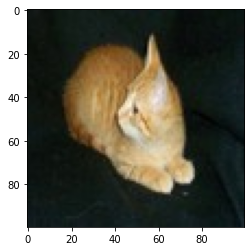

[[ True]]
Our model says it is a : dog


In [28]:
# MAKE THE PREDICTIONS USING TEST DATASET

import random
idx = random.randint(0, len(X_test))

print(plt.imshow(X_test[idx,:]))

plt.show()

# Predicted output
pred_y = cnn.predict(X_test[idx, :].reshape(1, 100,100,3))
pred_y = pred_y > 0.5
print(pred_y)

# To predict whether the image is a cat or a dog
if(pred_y > 0.5):
    pred_y = 'dog'
else:
    pred_y = 'cat'
print('Our model says it is a :', pred_y)